In [1]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import missingno as mno
import warnings 
warnings.filterwarnings('ignore')
print('done')

done


In [2]:
# Evaluation parameters
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Model 1
from sklearn.linear_model import LinearRegression

# Model 2
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

# Model 2
import xgboost as xg

from sklearn.neighbors import KNeighborsRegressor

from sklearn.neural_network import MLPRegressor

In [170]:
df_training = pd.read_csv(r".csv")
df_test_unseen = pd.read_csv(r".csv") # maui-6
# df_test_unseen is maui-6


#df_test_unseen = pd.read_csv(r.csv")
#df_test_unseen_depth= df_test_unseen_depth['DEPT']
# df_training = pd.read_csv(r.csv")
#df_training = pd.read_excel(r.xlsx")

<Axes: >

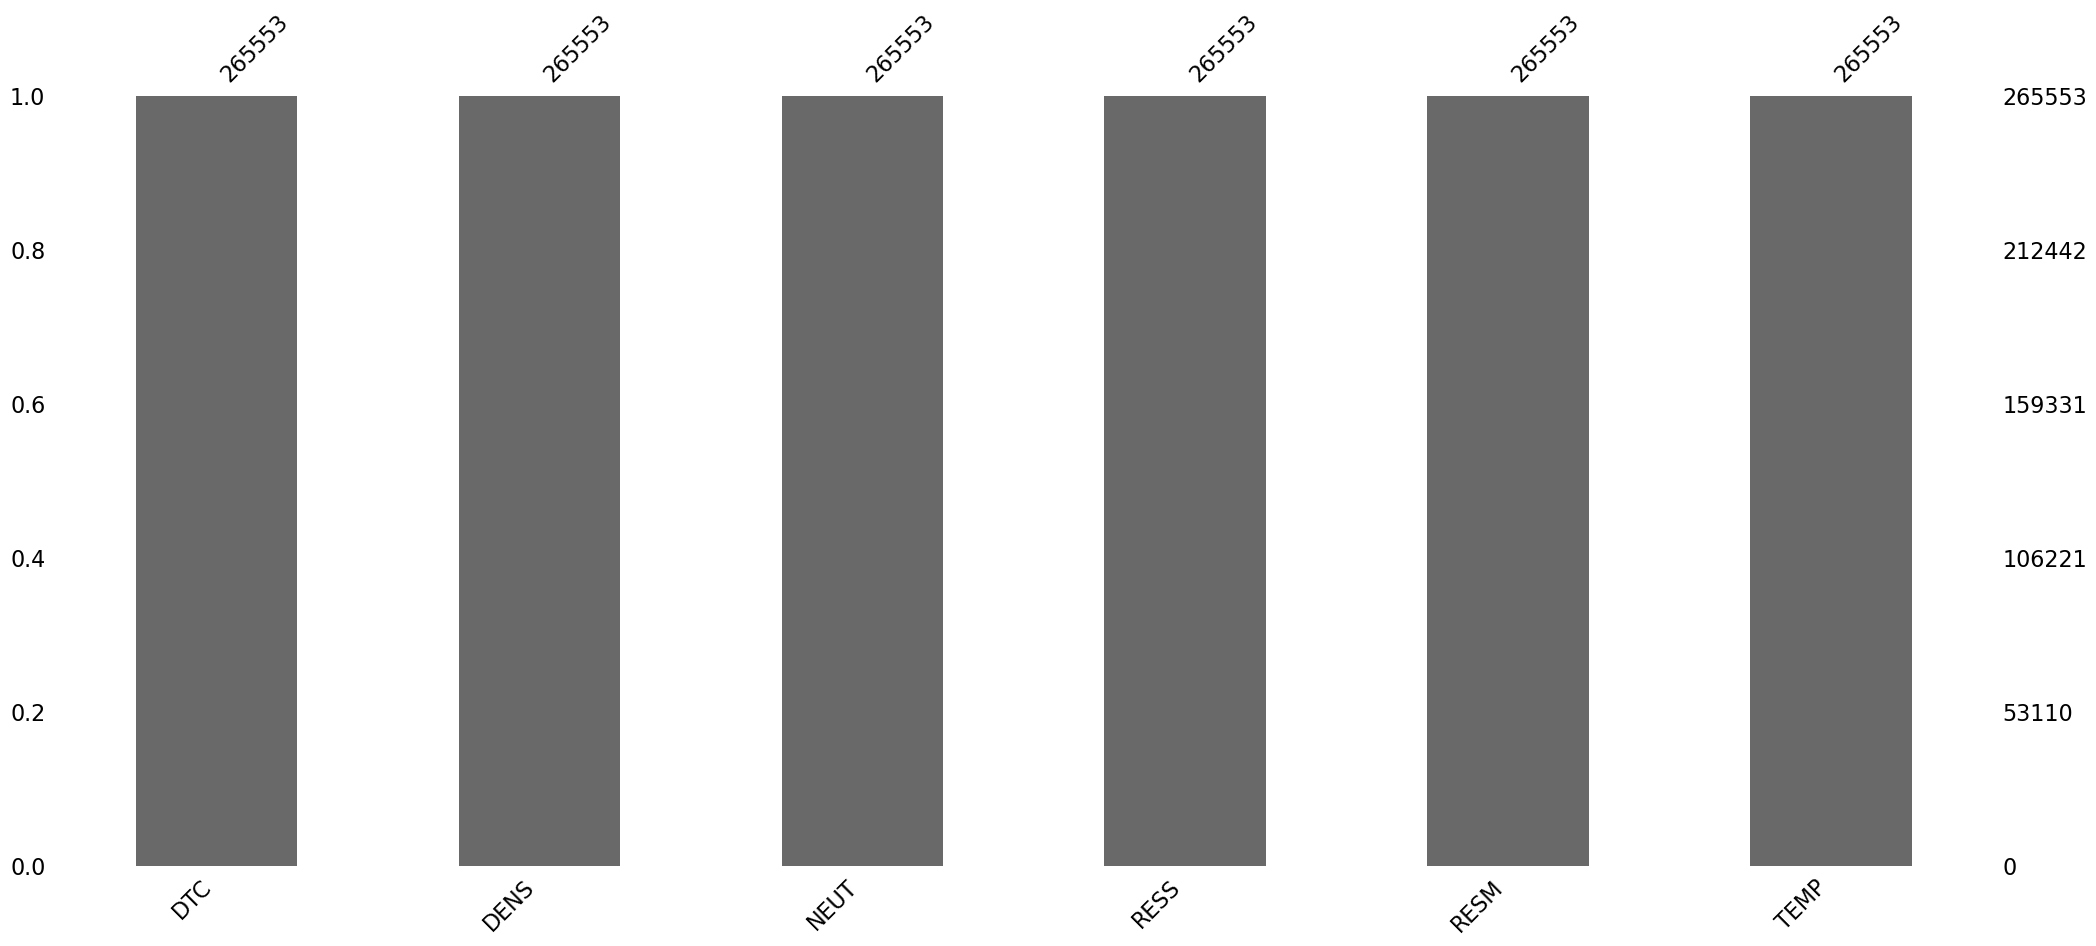

In [4]:
mno.bar(df_training)

<Axes: >

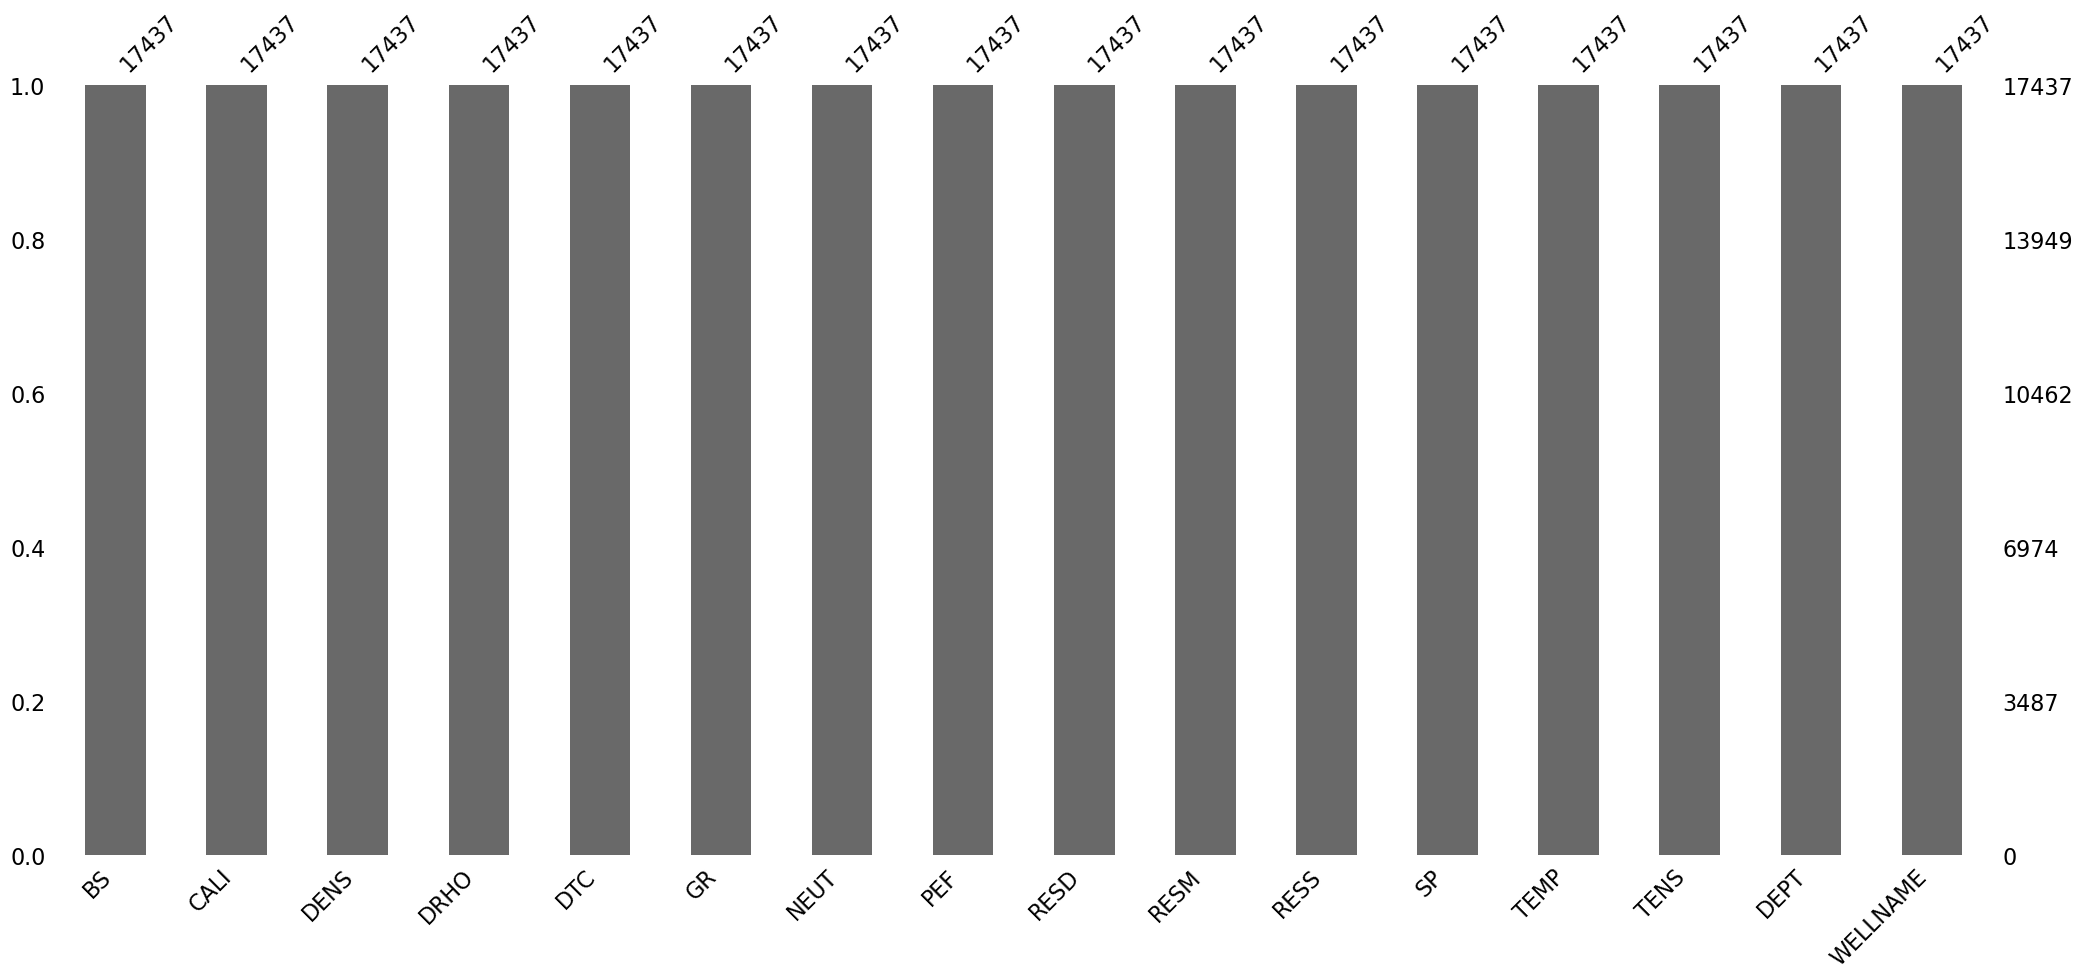

In [5]:
mno.bar(df_test_unseen)

<Axes: >

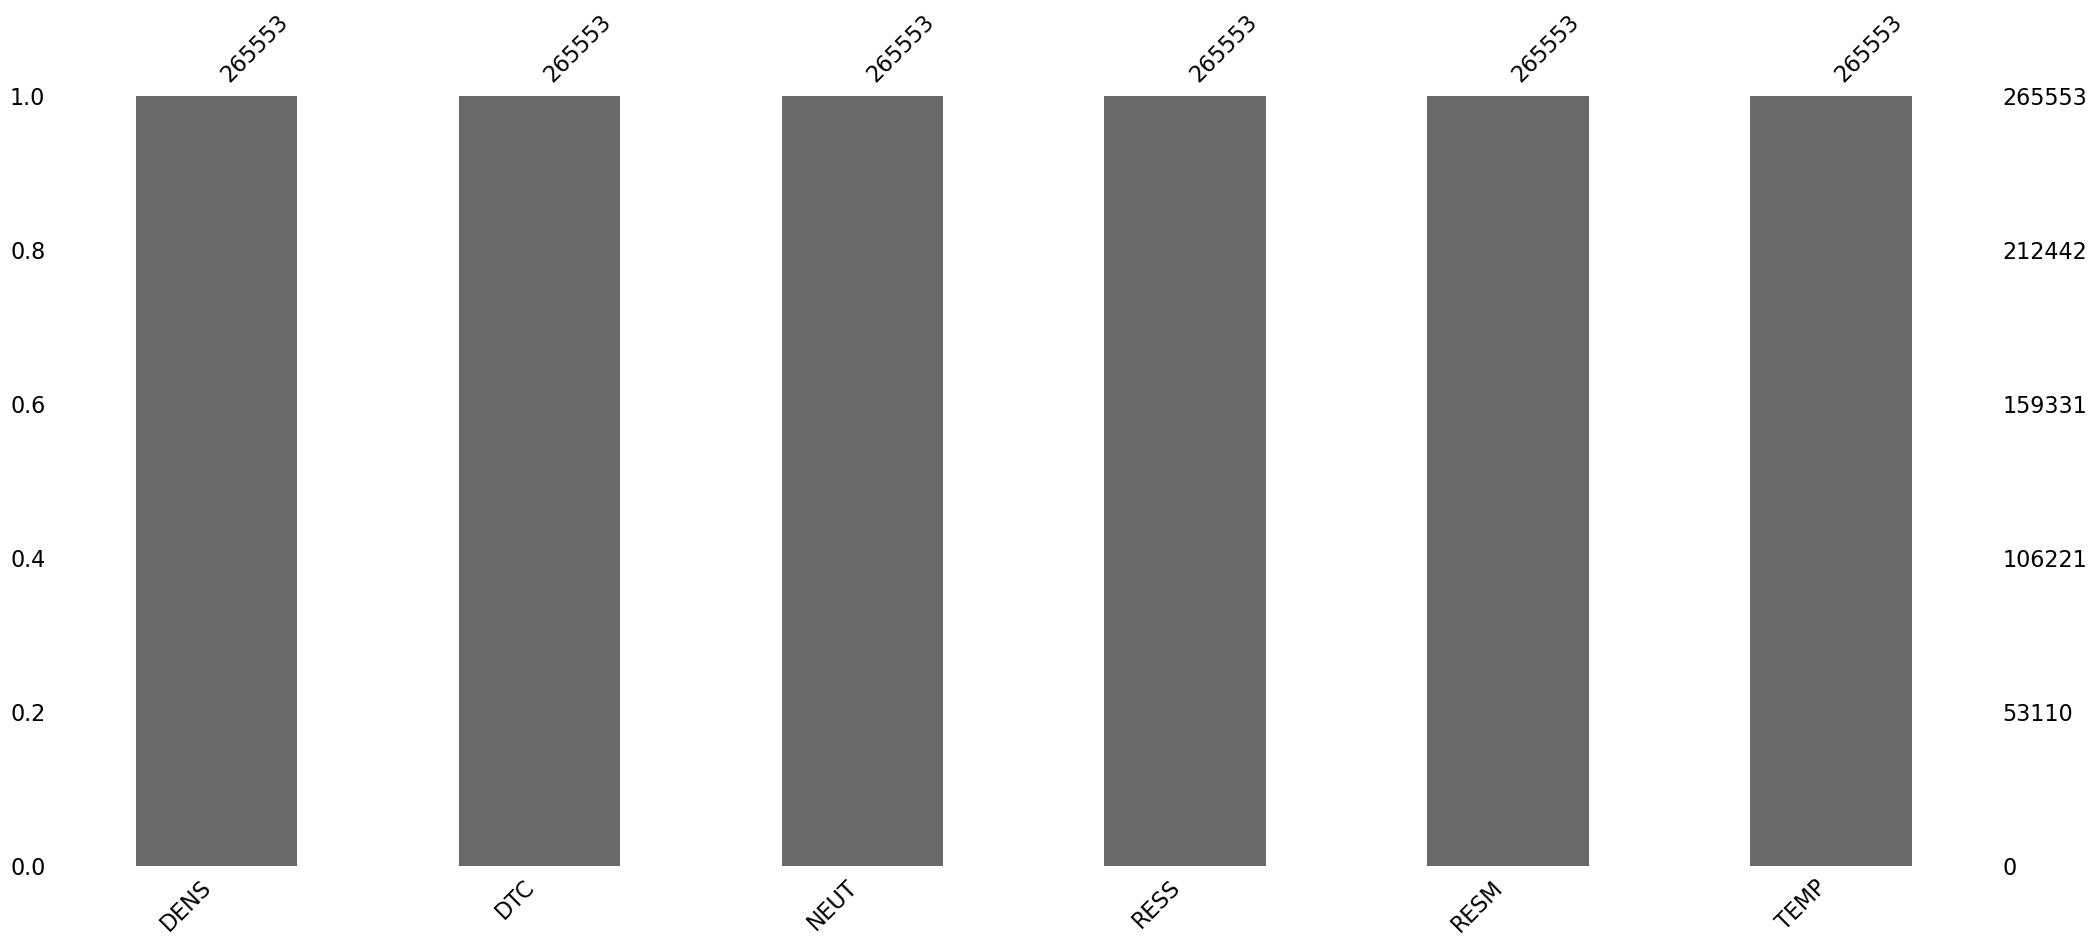

In [6]:
df_training = df_training[['DENS','DTC','NEUT','RESS','RESM', 'TEMP']]
#df_training.dropna(inplace= True)
mno.bar(df_training)

In [7]:
df_test_unseen

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
0,12.25,17.7214,2.1487,-0.0250,156.8824,73.1188,0.41430,2.8535,0.7625,4.6605,0.7985,-35.6182,36.5815,504.1021,496.0620,Maui-6
1,12.25,17.7305,2.1532,-0.0273,156.5489,73.3247,0.39868,2.8854,0.7898,3.2559,0.8175,-35.7843,36.5926,502.5190,496.2144,Maui-6
2,12.25,17.7396,2.1577,-0.0295,156.2154,73.5306,0.38307,2.9172,0.8171,1.8512,0.8366,-35.9505,36.6036,500.9359,496.3668,Maui-6
3,12.25,17.7532,2.1605,-0.0314,155.9431,73.7607,0.37135,2.9387,0.8414,0.6185,0.8537,-36.1196,36.6093,499.8964,496.5192,Maui-6
4,12.25,17.7986,2.1513,-0.0310,156.0952,74.1585,0.38666,2.8887,0.8450,0.5789,0.8570,-36.3096,36.5784,502.6287,496.6716,Maui-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17432,8.50,8.1306,2.2974,0.0041,79.0114,47.2912,0.19963,2.7559,1.2698,1.2958,1.6891,-57.5005,97.4267,1330.4543,3215.7924,Maui-6
17433,8.50,8.1349,2.3011,0.0041,78.9700,47.7268,0.19942,2.7227,1.3675,1.3794,1.8312,-57.4997,97.3776,1331.8687,3215.9448,Maui-6
17434,8.50,8.1386,2.3078,0.0030,78.3648,47.7752,0.19970,2.7491,1.4954,1.4951,2.0238,-57.4943,97.3853,1333.1067,3216.0972,Maui-6
17435,8.50,8.1419,2.3163,0.0013,77.4395,47.6036,0.20027,2.8094,1.6403,1.6289,2.2451,-57.4865,97.4251,1334.2445,3216.2496,Maui-6


In [8]:
df_test_unseen.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT
count,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.000000,17437.00000,17437.000000,17437.000000,17437.000000
mean,10.757269,11.413491,2.307110,-0.002629,101.688400,77.444747,0.318898,2.936228,2.372846,2.406978,2.720916,-33.90915,62.697587,939.745659,1846.635301
std,1.835671,2.091304,0.170601,0.021202,22.780875,13.216338,0.087742,0.401575,1.764867,6.871505,2.193881,13.58259,18.722328,229.251313,787.795421
min,8.500000,8.122600,1.390000,-0.252800,35.722300,27.567000,0.022700,1.900100,0.575700,0.351000,0.570000,-66.09900,36.497500,499.896400,496.062000
25%,8.500000,9.588100,2.159400,-0.012600,82.529700,70.302200,0.258360,2.706900,1.268200,0.920300,1.278400,-41.40760,45.997400,756.944600,1160.983200
50%,12.250000,12.115000,2.300200,-0.006800,95.092300,80.204500,0.330910,2.868100,1.695300,1.347600,1.787200,-35.72180,59.067900,986.560900,1840.077600
75%,12.250000,12.414100,2.448700,0.000900,121.464800,86.447000,0.390720,3.133900,3.126400,3.070900,3.705800,-28.94990,79.155700,1112.616200,2533.345200
max,12.250000,20.954800,2.687400,0.294500,166.861700,143.357200,0.533690,5.302800,24.317600,259.361000,32.181500,37.13740,97.699100,1458.173800,3216.402000


# unseen test data 

In [9]:
df_test_unseen #maui-6 well

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS,DEPT,WELLNAME
0,12.25,17.7214,2.1487,-0.0250,156.8824,73.1188,0.41430,2.8535,0.7625,4.6605,0.7985,-35.6182,36.5815,504.1021,496.0620,Maui-6
1,12.25,17.7305,2.1532,-0.0273,156.5489,73.3247,0.39868,2.8854,0.7898,3.2559,0.8175,-35.7843,36.5926,502.5190,496.2144,Maui-6
2,12.25,17.7396,2.1577,-0.0295,156.2154,73.5306,0.38307,2.9172,0.8171,1.8512,0.8366,-35.9505,36.6036,500.9359,496.3668,Maui-6
3,12.25,17.7532,2.1605,-0.0314,155.9431,73.7607,0.37135,2.9387,0.8414,0.6185,0.8537,-36.1196,36.6093,499.8964,496.5192,Maui-6
4,12.25,17.7986,2.1513,-0.0310,156.0952,74.1585,0.38666,2.8887,0.8450,0.5789,0.8570,-36.3096,36.5784,502.6287,496.6716,Maui-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17432,8.50,8.1306,2.2974,0.0041,79.0114,47.2912,0.19963,2.7559,1.2698,1.2958,1.6891,-57.5005,97.4267,1330.4543,3215.7924,Maui-6
17433,8.50,8.1349,2.3011,0.0041,78.9700,47.7268,0.19942,2.7227,1.3675,1.3794,1.8312,-57.4997,97.3776,1331.8687,3215.9448,Maui-6
17434,8.50,8.1386,2.3078,0.0030,78.3648,47.7752,0.19970,2.7491,1.4954,1.4951,2.0238,-57.4943,97.3853,1333.1067,3216.0972,Maui-6
17435,8.50,8.1419,2.3163,0.0013,77.4395,47.6036,0.20027,2.8094,1.6403,1.6289,2.2451,-57.4865,97.4251,1334.2445,3216.2496,Maui-6


In [10]:
df_test_unseen.columns

Index(['BS', 'CALI', 'DENS', 'DRHO', 'DTC', 'GR', 'NEUT', 'PEF', 'RESD',
       'RESM', 'RESS', 'SP', 'TEMP', 'TENS', 'DEPT', 'WELLNAME'],
      dtype='object')

In [11]:
X_test_unseen = df_test_unseen[['DENS','NEUT','RESS','RESM','TEMP']]  # X variables to test
y_test_unseen = df_test_unseen['DTC'] #label to validate 

In [164]:
X_test_unseen

,DENS,NEUT,RESS,RESM,TEMP
0,2.1487,0.41430,0.7985,4.6605,36.5815
1,2.1532,0.39868,0.8175,3.2559,36.5926
2,2.1577,0.38307,0.8366,1.8512,36.6036
3,2.1605,0.37135,0.8537,0.6185,36.6093
4,2.1513,0.38666,0.8570,0.5789,36.5784
...,...,...,...,...,...
17432,2.2974,0.19963,1.6891,1.2958,97.4267
17433,2.3011,0.19942,1.8312,1.3794,97.3776
17434,2.3078,0.19970,2.0238,1.4951,97.3853
17435,2.3163,0.20027,2.2451,1.6289,97.4251


In [12]:
y_test_unseen

0        156.8824
1        156.5489
2        156.2154
3        155.9431
4        156.0952
           ...   
17432     79.0114
17433     78.9700
17434     78.3648
17435     77.4395
17436     76.5142
Name: DTC, Length: 17437, dtype: float64

# Feature input

In [14]:
#X = df_training[['DENS','NEUT', 'RESS','RESM','TEMP']]
X = df_training[['DENS','NEUT','RESS','RESM','TEMP']]
y = df_training['DTC']


In [15]:
X.shape

(265553, 5)

# Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

# Standardisation of the test data (unseen)

In [67]:
x_test_unseen_tr = scaler.transform(X_test_unseen) # maui-6 well
x_test_unseen_tr2 = scaler.transform(X_test_unseen2) # maui-6 well

# Train test split

In [17]:
# splitting training and testing data

X_train, X_val, y_train, y_val = train_test_split(X_trans, y, test_size = 0.2)

# Model 1 Multiple Linear Regression

In [18]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred1 = model1.predict(X_val)

In [20]:
mae1 = metrics.mean_absolute_error(y_val, y_pred1)  #random forest regression
print("MAE_Linear: ", mae1 )

mse1 = metrics.mean_squared_error(y_val, y_pred1)  #random forest regression
print('MSE_Linear: ', mse1)

RMSE1 = mse1 ** 0.5 #random forest regression
print('RMSE_Linear: ', RMSE1)

r2_linear = metrics.r2_score(y_val,y_pred1)  # random forest regression
print("R2-Score Linear Regression: ",r2_linear)

MAE_Linear:  5.353939341183522
MSE_Linear:  56.180641777729214
RMSE_Linear:  7.49537469228385
R2-Score Linear Regression:  0.7919036635024538


(0.0, 180.0)

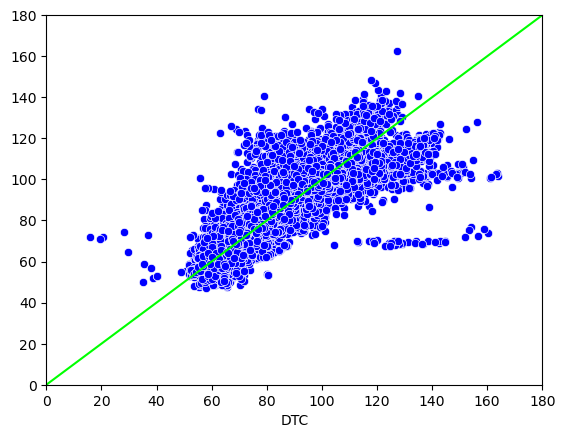

In [133]:
sns.scatterplot(x = y_val, y = y_pred1, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)

In [110]:
mae1un = metrics.mean_absolute_error(y_test_unseen, y_test_pred1)  #Linear regression
print("MAE_Linear: ", mae1un )

mse1un = metrics.mean_squared_error(y_test_unseen, y_test_pred1)  #linear regression
print('MSE_Linear: ', mse1un)

RMSE1un = mse1un ** 0.5 #linear regression
print('RMSE_Linear: ', RMSE1un)

r2_lin_un = metrics.r2_score(y_test_unseen, y_test_pred1)  #linear regression
print("R2-Score sgd : ",r2_lin_un)

MAE_Linear:  8.171936161423773
MSE_Linear:  159.94031451935174
RMSE_Linear:  12.64675114483367
R2-Score sgd :  0.6917933045567805


(0.0, 180.0)

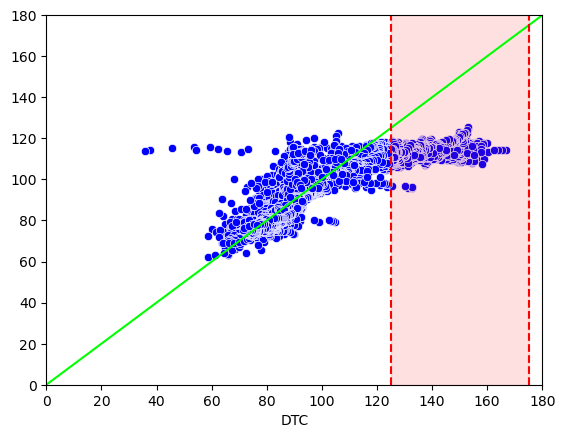

In [155]:
sns.scatterplot(x = y_test_unseen, y = y_test_pred1, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.axvline(125, color = "red", linestyle = "--")
plt.axvline(175, color = "red", linestyle = "--")
plt.axvspan(125,175, color= 'red', alpha = 0.12)
plt.xlim(0,180)
plt.ylim(0,180)


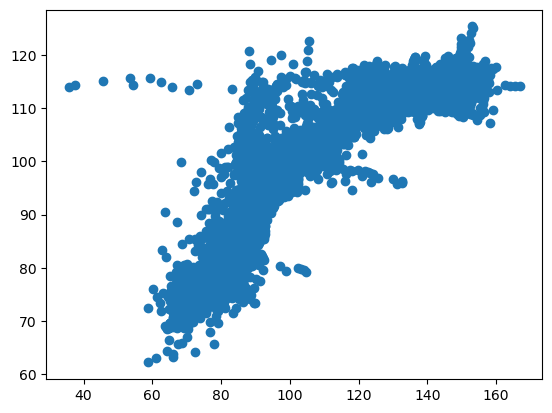

In [108]:
plt.scatter(y_test_unseen, y_test_pred1.)

# Model 2 Stochastic Gradient Descent

In [23]:
model2 = SGDRegressor(random_state=42, loss = 'squared_error')
model2.fit(X_train, y_train)

#'squared_error',
#    'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'


SGDRegressor(random_state=42)

In [24]:
y_pred2 = model2.predict(X_val)

In [25]:
mae2 = metrics.mean_absolute_error(y_val, y_pred2)  #SGD regression
print("MAE_Linear: ", mae2 )

mse2 = metrics.mean_squared_error(y_val, y_pred2)  #SGD regression
print('MSE_Linear: ', mse2)

RMSE2 = mse2 ** 0.5 #SGD regression
print('RMSE_Linear: ', RMSE2)

r2_sgd = metrics.r2_score(y_val,y_pred2)  # SGD regression
print("R2-Score Linear Regression: ",r2_sgd)

MAE_Linear:  5.360405055451525
MSE_Linear:  56.2057768748084
RMSE_Linear:  7.497051211963835
R2-Score Linear Regression:  0.7918105616535931


(0.0, 180.0)

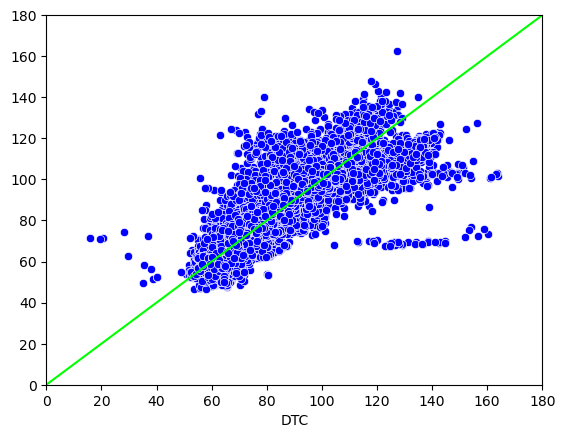

In [134]:
sns.scatterplot(x = y_val, y = y_pred2, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)

In [101]:
y_test_pred2 = model2.predict(x_test_unseen_tr)

In [102]:
mae2un = metrics.mean_absolute_error(y_test_unseen, y_test_pred2)  #SGD regression
print("MAE_Linear: ", mae2un )

mse2un = metrics.mean_squared_error(y_test_unseen, y_test_pred2)  #SGD regression
print('MSE_Linear: ', mse2un)

RMSE2un = mse2un ** 0.5 #SGD regression
print('RMSE_Linear: ', RMSE2un)

r2_sgd_un = metrics.r2_score(y_test_unseen, y_test_pred2)  # SGD regression
print("R2-Score sgd : ",r2_sgd_un)

MAE_Linear:  8.213541715382599
MSE_Linear:  161.41810613044575
RMSE_Linear:  12.705042547368574
R2-Score sgd :  0.688945584328283


(0.0, 180.0)

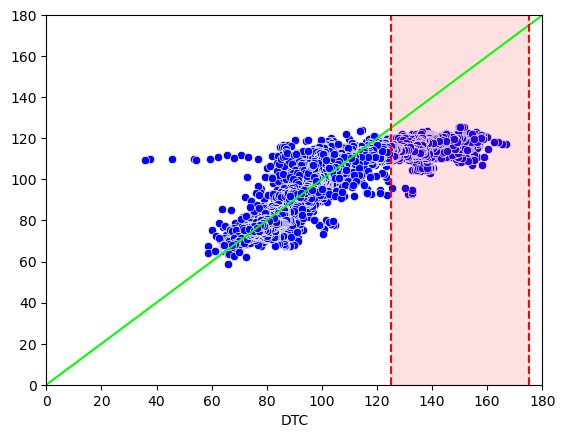

In [224]:
sns.scatterplot(x = y_test_unseen, y = y_test_pred3, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.axvline(125, color = "red", linestyle = "--")
plt.axvline(175, color = "red", linestyle = "--")
plt.axvspan(125,175, color= 'red', alpha = 0.12)
plt.xlim(0,180)
plt.ylim(0,180)


# Model 3 XGBoost

In [218]:
model3 = xg.XGBRegressor(objective ='reg:linear')
model3.fit(X_train, y_train)

[18:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [219]:
y_pred3 = model3.predict(X_val)

In [220]:
mae3 = metrics.mean_absolute_error(y_val, y_pred3)  #SGD regression
print("MAE_Linear: ", mae3 )

mse3 = metrics.mean_squared_error(y_val, y_pred3)  #SGD regression
print('MSE_Linear: ', mse3)

RMSE3 = mse3 ** 0.5 #SGD regression
print('RMSE_Linear: ', RMSE3)

r2_KNR = metrics.r2_score(y_val,y_pred3)  # SGD regression
print("R2-Score K neighbors: ",r2_KNR)

MAE_Linear:  2.2064079391652736
MSE_Linear:  11.913674385015687
RMSE_Linear:  3.4516190961656945
R2-Score K neighbors:  0.9558710631403073


In [221]:
y_test_pred3 = model3.predict(x_test_unseen_tr)

In [222]:
mae3un = metrics.mean_absolute_error(y_test_unseen, y_test_pred3)  #SGD regression
print("MAE_Linear: ", mae3un )

mse3un = metrics.mean_squared_error(y_test_unseen, y_test_pred3)  #SGD regression
print('MSE_Linear: ', mse3un)

RMSE3un = mse3un ** 0.5 #SGD regression
print('RMSE_Linear: ', RMSE3un)

r2_KNR_un = metrics.r2_score(y_test_unseen, y_test_pred3)  # SGD regression
print("R2-Score K neighbors: ",r2_KNR_un)

MAE_Linear:  7.5615727355474
MSE_Linear:  130.5466073362952
RMSE_Linear:  11.425699424380777
R2-Score K neighbors:  0.7484352924442018


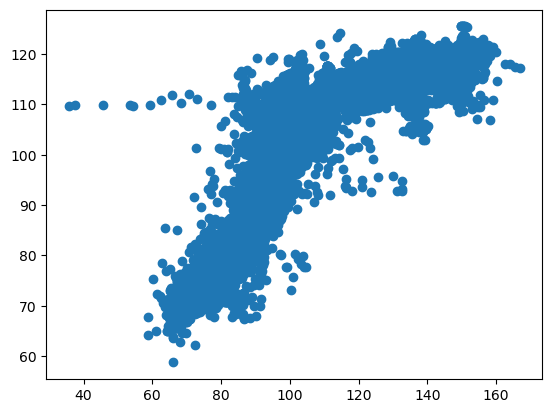

In [223]:
plt.scatter(y_test_unseen, y_test_pred3)

# Model 4 Random Forest

In [35]:
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
y_pred4 = model4.predict(X_val)

In [37]:
mae4 = metrics.mean_absolute_error(y_val, y_pred4)  #SGD regression
print("MAE:", mae4)

mse4 = metrics.mean_squared_error(y_val, y_pred4)  #SGD regression
print('MSE:', mse4)

RMSE4 = mse4 ** 0.5 #SGD regression
print('RMSE: ', RMSE4)

r2_RF = metrics.r2_score(y_val,y_pred4)  # SGD regression
print("R2-Score RF:",r2_RF)

MAE: 1.3482874184443903
MSE: 6.710506498558351
RMSE:  2.590464533352725
R2-Score RF: 0.9751438970042785


(0.0, 180.0)

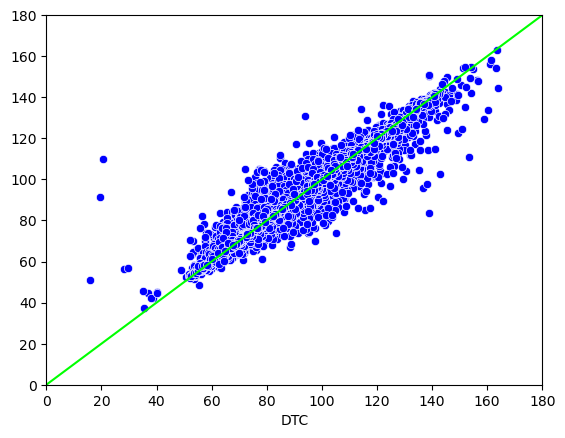

In [408]:
sns.scatterplot(x = y_val, y = y_pred4, color ='blue')
plt.plot((0,180),(0,180),'lime')

plt.xlim(0,180)
plt.ylim(0,180)

In [38]:
# test_well = pd.read_csv(r"Test_kea1.csv")

In [39]:
# test_well.dropna(inplace = True)

In [40]:
# X_test_unseen1 = test_well[['DENS', 'NEUT', 'DEPT', 'CALI', 'GR']]  # X variables to test
# y_test_unseen1 = test_well['DTC'] #label to validate 

In [117]:
y_test_pred1 = model1.predict(x_test_unseen_tr)
y_test_pred2 = model2.predict(x_test_unseen_tr)
y_test_pred3 = model3.predict(x_test_unseen_tr)
y_test_pred4 = model4.predict(x_test_unseen_tr)

In [69]:
mae4un = metrics.mean_absolute_error(y_test_unseen, y_test_pred4)  #SGD regression
print("MAE: ", mae4un )

mse4un = metrics.mean_squared_error(y_test_unseen, y_test_pred4)  #SGD regression
print('MSE: ', mse4un)

RMSE4un = mse4un ** 0.5 #SGD regression
print('RMSE: ', RMSE4un)

r2_RF_un = metrics.r2_score(y_test_unseen, y_test_pred4)  # SGD regression
print("R2-Score RF unseen: ",r2_RF_un)

MAE:  8.38384127883237
MSE:  141.8886747764645
RMSE:  11.911703269325697
R2-Score RF unseen:  0.7265790072684855


In [70]:
r2_lin_un = metrics.r2_score(y_test_unseen, y_test_pred1)  # SGD regression
print("R2-Score RF unseen: ",r2_lin_un)

R2-Score RF unseen:  0.6917933045567805


In [96]:
r2_sgd_un = metrics.r2_score(y_test_unseen, y_test_pred2)  # SGD regression
print("R2-Score RF unseen: ",r2_sgd_un)

R2-Score RF unseen:  0.688945584328283


In [99]:
r2_KNR_un = metrics.r2_score(y_test_unseen, y_test_pred3)  # SGD regression
print("R2-Score RF unseen: ",r2_KNR_un)

R2-Score RF unseen:  0.7346152059081047


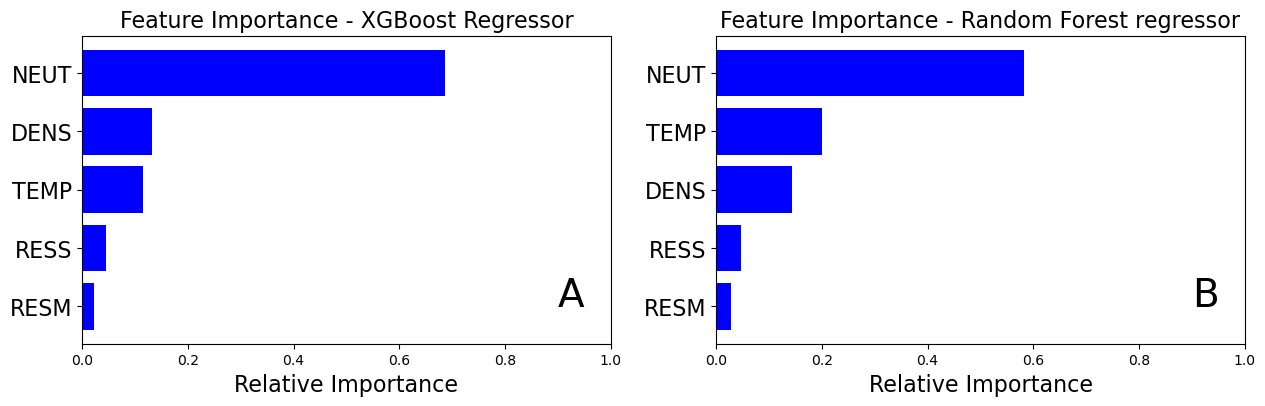

In [445]:
fig = plt.figure(figsize = (15,4))
fig.add_subplot(1,2,1)
features = X.columns
xgb_imp_features = model3.feature_importances_
indices2 = np.argsort(xgb_imp_features)[-5:]
plt.barh(range(len(indices2)),xgb_imp_features[indices2], color = 'blue')
plt.yticks(range(len(indices2)),[features[i] for i in indices2], fontsize = 16)
plt.text(0.9,0, "A", fontsize = 28)
plt.xlim(0,1)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - XGBoost Regressor', fontsize = 16)

fig.add_subplot(1,2,2)
features = X.columns
rf_imp_features = model4.feature_importances_
indices = np.argsort(rf_imp_features)[-5:]
plt.barh(range(len(indices)),rf_imp_features[indices], color = 'blue')
plt.yticks(range(len(indices)),[features[i] for i in indices], fontsize = 16)
plt.text(0.9,0, "B", fontsize = 28)
plt.xlim(0,1)
plt.xlabel('Relative Importance', fontsize = 16)
plt.title('Feature Importance - Random Forest regressor', fontsize = 16)

# plt.savefig('Feature importance.png', dpi = 1200,  bbox_inches='tight')
# plt.show()

# Metrics validation data

In [395]:
########################################################
MAE_lin1 = metrics.mean_absolute_error(y_val, y_pred1)  # linear regression
print("MAE_lin: ", round(MAE_lin1,2))
MAE_SGD1 = metrics.mean_absolute_error(y_val, y_pred2)  # random forest regressor
print("MAE_SGD: ", round(MAE_SGD1,2))
MAE_XGB1 = metrics.mean_absolute_error(y_val, y_pred3)  # Ada Boost regression
print("MAE_XGB: ", round(MAE_XGB1,2))
MAE_RF1 = metrics.mean_absolute_error(y_val, y_pred4)  # Gradient boost
print("MAE_RF: ", round(MAE_RF1,2))
#########################################################
MSE_lin1 = metrics.mean_squared_error(y_val, y_pred1)  # linear regression
print("MSE_lin: ", round(MSE_lin1,2))
MSE_SGD1 = metrics.mean_squared_error(y_val, y_pred2)  # random forest regressor
print("MSE_SGD: ", round(MSE_SGD1,2))
MSE_XGB1 = metrics.mean_squared_error(y_val, y_pred3)  # Ada Boost regression
print("MSE_XGB: ", round(MSE_XGB1,2))
MSE_RF1 = metrics.mean_squared_error(y_val, y_pred4)  # Gradient boost
print("MSE_RF: ", round(MSE_RF1,2))
########################################################
RMSE_lin1 = MSE_lin1**(1/2)
print("RMSE_lin: ", round(RMSE_lin1,2))
RMSE_SGD1 = MSE_SGD1**(1/2)
print("RMSE_SGD: ", round(RMSE_SGD1,2))
RMSE_XGB1 = MSE_XGB1**(1/2)
print("RMSE_XGB: ", round(RMSE_XGB1,2))
RMSE_RF1 = MSE_RF1**(1/2)
print("RMSE_RF: ", round(RMSE_RF1,2))
#######################################################

R2_lin1 = metrics.r2_score(y_val,y_pred1)  # Linear regression
print("R2-Score Linear Regression: ",round(R2_lin1,2))
R2_SGD1 = metrics.r2_score(y_val,y_pred2)  # Random forest regressor
print("R2-Score SGD Regressor: ",round(R2_SGD1,2))
R2_XGB1 = metrics.r2_score(y_val,y_pred3)  # AdaBoost regressor
print("R2-Score XGBoost Regressor: ",round(R2_XGB1,2))
R2_RF1 = metrics.r2_score(y_val,y_pred4)  # GradientBoost regression
print("R2-Score Random Forest Regressor: ",round(R2_RF1,2))


MAE_lin:  5.35
MAE_SGD:  5.36
MAE_XGB:  2.21
MAE_RF:  1.35
MSE_lin:  56.18
MSE_SGD:  56.21
MSE_XGB:  11.91
MSE_RF:  6.71
RMSE_lin:  7.5
RMSE_SGD:  7.5
RMSE_XGB:  3.45
RMSE_RF:  2.59
R2-Score Linear Regression:  0.79
R2-Score SGD Regressor:  0.79
R2-Score XGBoost Regressor:  0.96
R2-Score Random Forest Regressor:  0.98


In [428]:
models = ['Linear regression','SGD regressor','XGBoost regressor','Random forest regressor']

mae1 = [MAE_lin1, MAE_SGD1, MAE_XGB1, MAE_RF1]
mse1 = [MSE_lin1, MSE_SGD1, MSE_XGB1, MSE_RF1]
rmse1 = [RMSE_lin1, RMSE_SGD1, RMSE_XGB1, RMSE_RF1]
r2score1 = [R2_lin1,R2_SGD1,R2_XGB1,R2_RF1]


mae1 = [round(i,2) for i in mae1]
mse1 = [round(i,3) for i in mse1]
rmse1 = [round(i,2) for i in rmse1]
r2score1 = [round(i,2) for i in r2score1]

# model_eval1 = pd.DataFrame(data={"Model":models,"MAE": mae1,"MSE":mse1,"RMSE":rmse1, "R2 Score":r2score1})
# model_eval1.to_csv(r"s\Metrics1.csv",index = False)
# model_eval1

,Model,MAE,MSE,RMSE,R2 Score
0,Linear regression,5.35,56.181,7.50,0.79
1,SGD regressor,5.36,56.206,7.50,0.79
2,XGBoost regressor,2.21,11.914,3.45,0.96
3,Random forest regressor,1.35,6.711,2.59,0.98


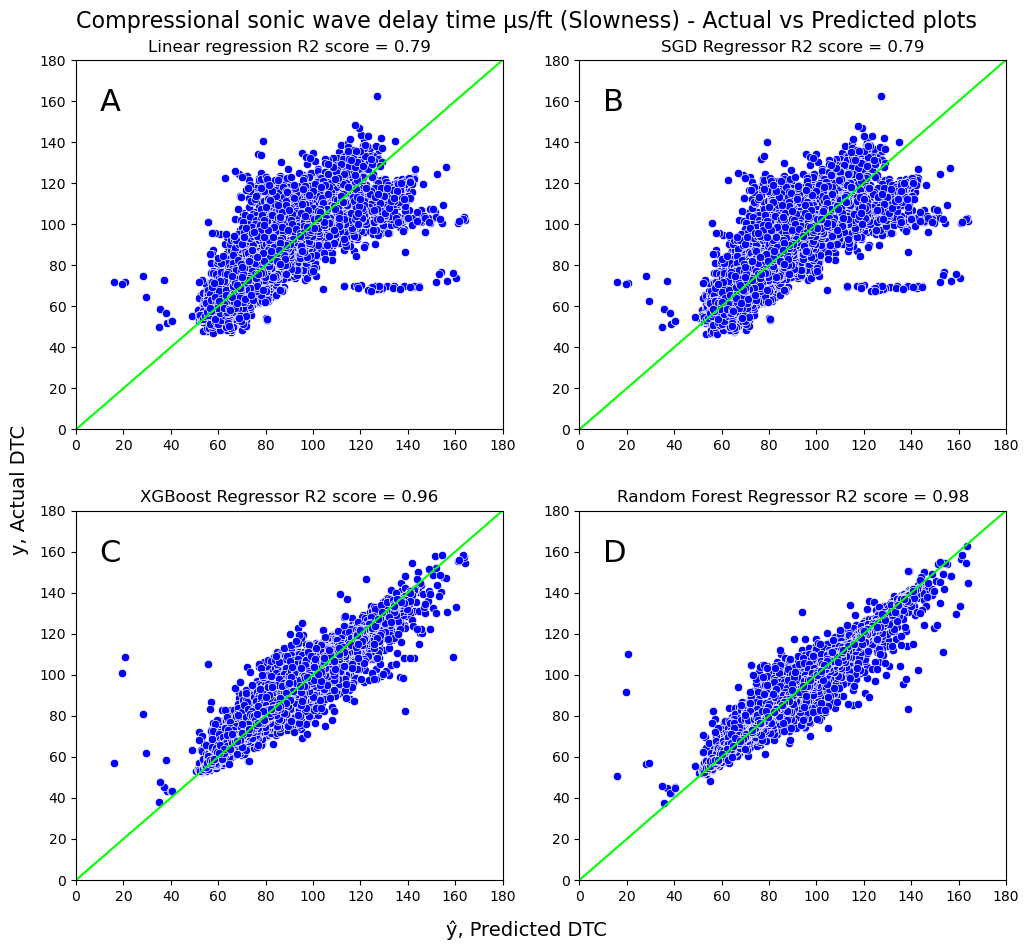

In [416]:
fig = plt.figure(figsize = (12,10))

r2score1 = [R2_lin1,R2_SGD1,R2_XGB1,R2_RF1]
r2score1 = [round(i,2) for i in r2score1]

fig.add_subplot(2,2,1)
sns.scatterplot(x = y_val, y = y_pred1, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)
plt.text(10, 155, "A", fontsize = 22)
plt.xlabel(None)
plt.title(f'Linear regression R2 score = {r2score1[0]}')

fig.add_subplot(2,2,2)
sns.scatterplot(x = y_val, y = y_pred2, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)
plt.text(10, 155, "B", fontsize = 22)
plt.xlabel(None)
plt.title(f'SGD Regressor R2 score = {r2score1[1]}')


fig.add_subplot(2,2,3)
sns.scatterplot(x = y_val, y = y_pred3, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)
plt.text(10, 155, "C", fontsize = 22)
plt.xlabel(None)
plt.title(f'XGBoost Regressor R2 score = {r2score1[2]}')

fig.add_subplot(2,2,4)
sns.scatterplot(x = y_val, y = y_pred4, color ='blue')
plt.plot((0,180),(0,180),'lime')
plt.xlim(0,180)
plt.ylim(0,180)
plt.text(10, 155, "D", fontsize = 22)
plt.xlabel(None)
plt.title(f'Random Forest Regressor R2 score = {r2score1[3]}')


fig.supylabel('y, Actual DTC',x = 0.07, y =0.5, fontsize = 14)
fig.supxlabel('ŷ, Predicted DTC', x = 0.5,y = 0.05,fontsize = 14)

fig.suptitle('Compressional sonic wave delay time µs/ft (Slowness) - Actual vs Predicted plots', fontsize  = 16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.18, hspace=0.22)
fig.subplots_adjust(top=0.93)
# plt.savefig('DTC Actual vs Pred val data.png', dpi = 1200,  bbox_inches='tight')
# plt.show()

In [71]:
y_test_unseen

0        156.8824
1        156.5489
2        156.2154
3        155.9431
4        156.0952
           ...   
17432     79.0114
17433     78.9700
17434     78.3648
17435     77.4395
17436     76.5142
Name: DTC, Length: 17437, dtype: float64

In [72]:
X_test_unseen

,DENS,NEUT,RESS,RESM,TEMP
0,2.1487,0.41430,0.7985,4.6605,36.5815
1,2.1532,0.39868,0.8175,3.2559,36.5926
2,2.1577,0.38307,0.8366,1.8512,36.6036
3,2.1605,0.37135,0.8537,0.6185,36.6093
4,2.1513,0.38666,0.8570,0.5789,36.5784
...,...,...,...,...,...
17432,2.2974,0.19963,1.6891,1.2958,97.4267
17433,2.3011,0.19942,1.8312,1.3794,97.3776
17434,2.3078,0.19970,2.0238,1.4951,97.3853
17435,2.3163,0.20027,2.2451,1.6289,97.4251


In [73]:
y_test_pred4

array([121.271312, 120.142173, 119.981427, ...,  76.760233,  76.456066,
        76.161386])

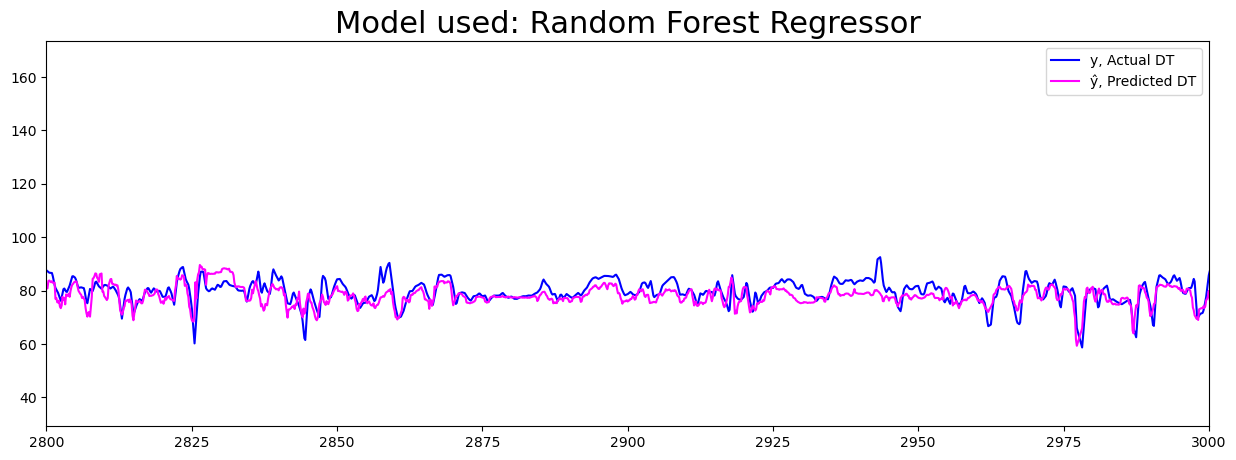

In [94]:
fig = plt.figure(figsize = (15,5))
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred4,label ='ŷ, Predicted DT', color = 'magenta')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: Random Forest Regressor', fontsize = 22)
plt.legend()

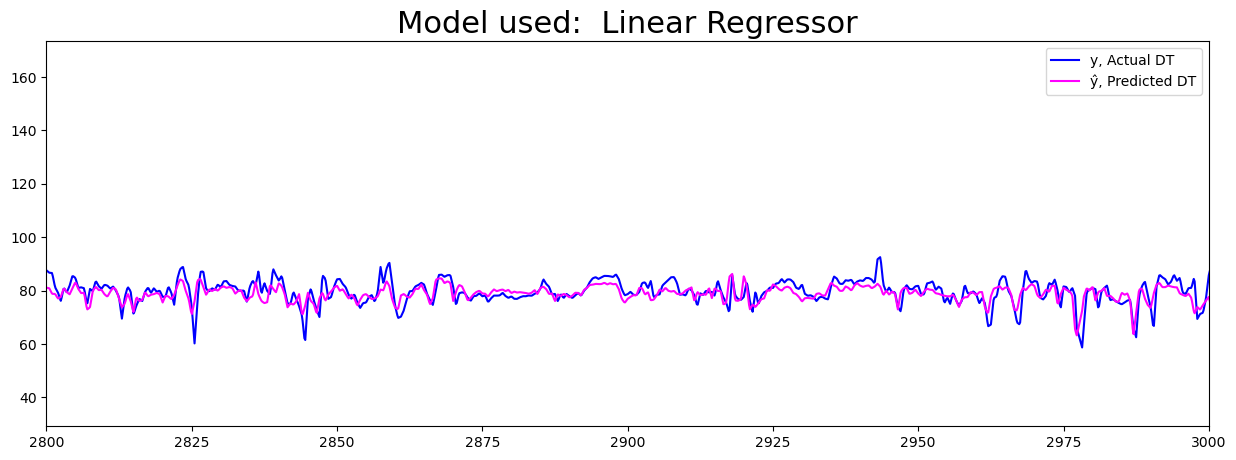

In [93]:
fig = plt.figure(figsize = (15,5))
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred1,label ='ŷ, Predicted DT', color = 'magenta')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used:  Linear Regressor', fontsize = 22)
plt.legend()

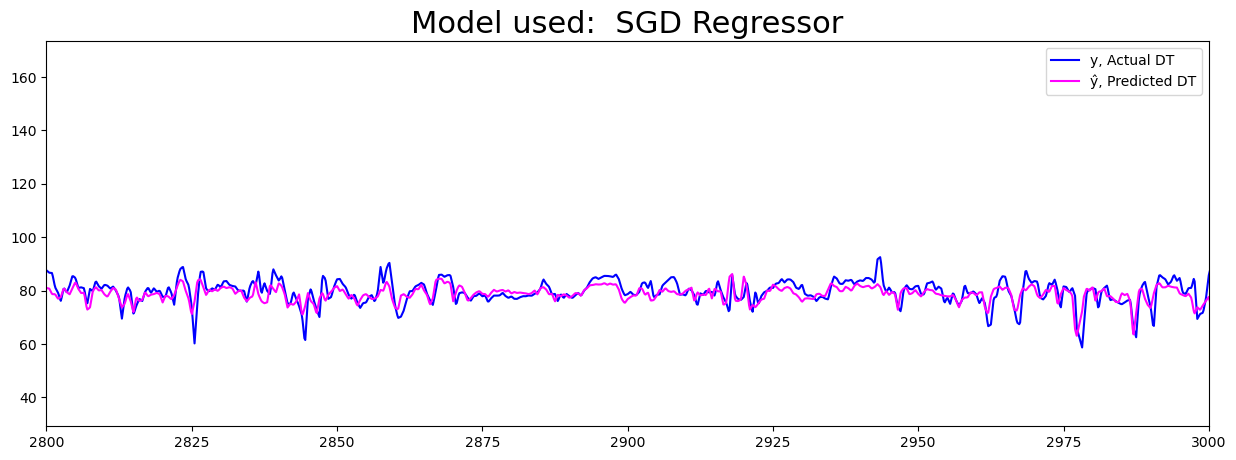

In [97]:
fig = plt.figure(figsize = (15,5))
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTy, Actual DT', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred2,label ='ŷ, Predicted DT', color = 'magenta')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used:  SGD Regressor', fontsize = 22)
plt.legend()

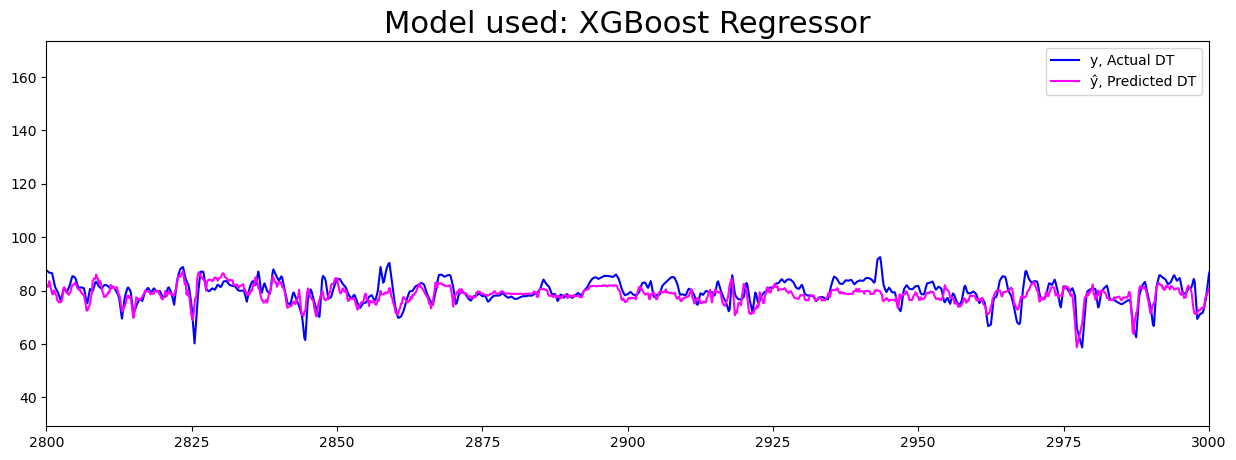

In [225]:
fig = plt.figure(figsize = (15,5))
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DT', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred3,label ='ŷ, Predicted DT', color = 'magenta')
#plt.xlabel('Depth in m')
#plt.ylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)')
plt.xlim(2800,3000)
plt.title('Model used: XGBoost Regressor', fontsize = 22)
plt.legend()

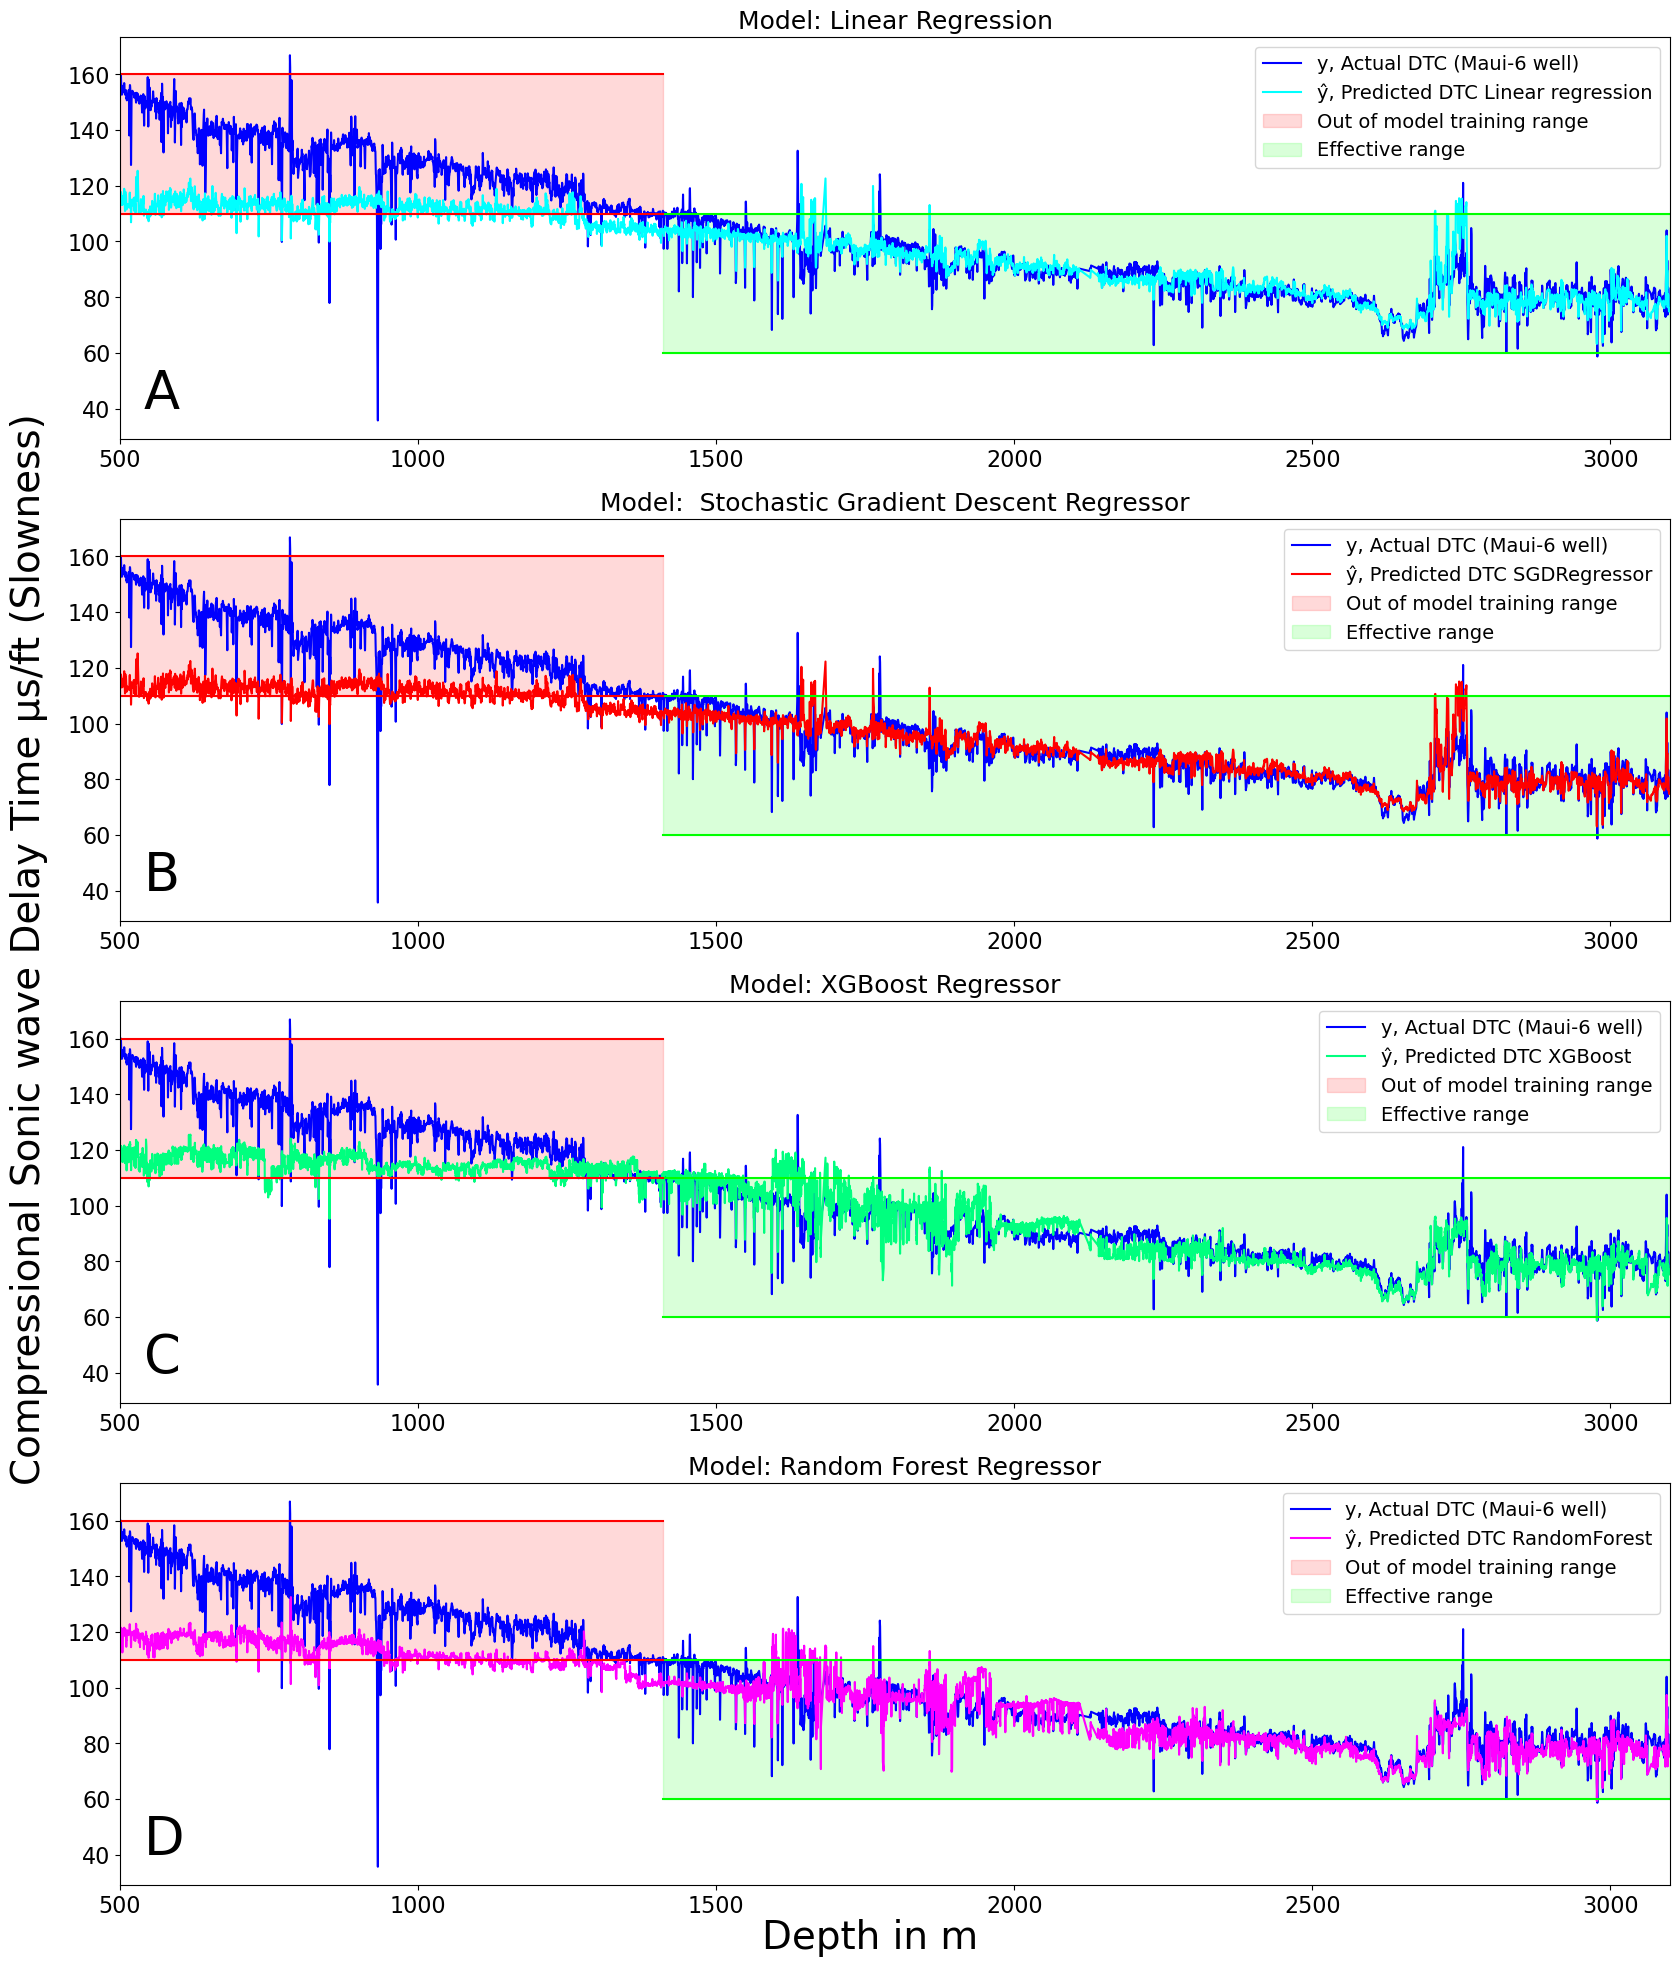

In [422]:
fig = plt.figure(figsize = (20,24))
fontsize_title = 18
fontsize_ticks = 16
fontsize_leg = 14
font_figmark = 38

fig.add_subplot(4,1,1)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred1,label ='ŷ, Predicted DTC Linear regression', color = 'aqua')
plt.xlim(500,3100)
plt.title('Model: Linear Regression', fontsize = fontsize_title)
plt.axhline(60, xmin = 0.35, color = "lime")
plt.axhline(110, xmin =0.35,color = "lime")
plt.axhline(110, xmax =0.35,color = "red")
plt.axhline(160, xmax =0.35,color = "red")
plt.axhspan(110,160, xmax=0.35, color = 'red' ,alpha = 0.15, label = "Out of model training range")
plt.axhspan(60,110, xmin=0.35, color = 'lime' ,alpha = 0.15, label = "Effective range")
# plt.xticks(fontsize=fontsize_ticks, rotation=90)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(540,40, 'A', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)


fig.add_subplot(4,1,2)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred2,label ='ŷ, Predicted DTC SGDRegressor', color = 'red')
plt.xlim(500,3100)
plt.title('Model:  Stochastic Gradient Descent Regressor', fontsize = fontsize_title)
plt.axhline(60, xmin = 0.35, color = "lime")
plt.axhline(110, xmin =0.35,color = "lime")
plt.axhline(110, xmax =0.35,color = "red")
plt.axhline(160, xmax =0.35,color = "red")
plt.axhspan(110,160, xmax=0.35, color = 'red' ,alpha = 0.15, label = "Out of model training range")
plt.axhspan(60,110, xmin=0.35, color = 'lime' ,alpha = 0.15, label = "Effective range")
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(540,40, 'B', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)

fig.add_subplot(4,1,3)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred3,label ='ŷ, Predicted DTC XGBoost', color = 'springgreen')
plt.xlim(500,3100)
plt.title('Model: XGBoost Regressor', fontsize = fontsize_title)
plt.axhline(60, xmin = 0.35, color = "lime")
plt.axhline(110, xmin =0.35,color = "lime")
plt.axhline(110, xmax =0.35,color = "red")
plt.axhline(160, xmax =0.35,color = "red")
plt.axhspan(110,160, xmax=0.35, color = 'red' ,alpha = 0.15, label = "Out of model training range")
plt.axhspan(60,110, xmin=0.35, color = 'lime' ,alpha = 0.15, label = "Effective range")
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(540,40, 'C', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)

fig.add_subplot(4,1,4)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred4,label ='ŷ, Predicted DTC RandomForest', color = 'magenta')
plt.xlim(500,3100)
plt.title('Model: Random Forest Regressor', fontsize = fontsize_title)
plt.axhline(60, xmin = 0.35, color = "lime")
plt.axhline(110, xmin =0.35,color = "lime")
plt.axhline(110, xmax =0.35,color = "red")
plt.axhline(160, xmax =0.35,color = "red")
plt.axhspan(110,160, xmax=0.35, color = 'red' ,alpha = 0.15, label = "Out of model training range")
plt.axhspan(60,110, xmin=0.35, color = 'lime' ,alpha = 0.15, label = "Effective range")

plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

fig.supylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)',x = 0.07, y =0.5, fontsize = 28)
fig.supxlabel('Depth in m', x = 0.5,y = 0.08,fontsize = 28)

plt.text(540,40, 'D', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)

# plt.savefig('results 500 to 3000.png', dpi = 1200,  bbox_inches='tight')
# plt.show()

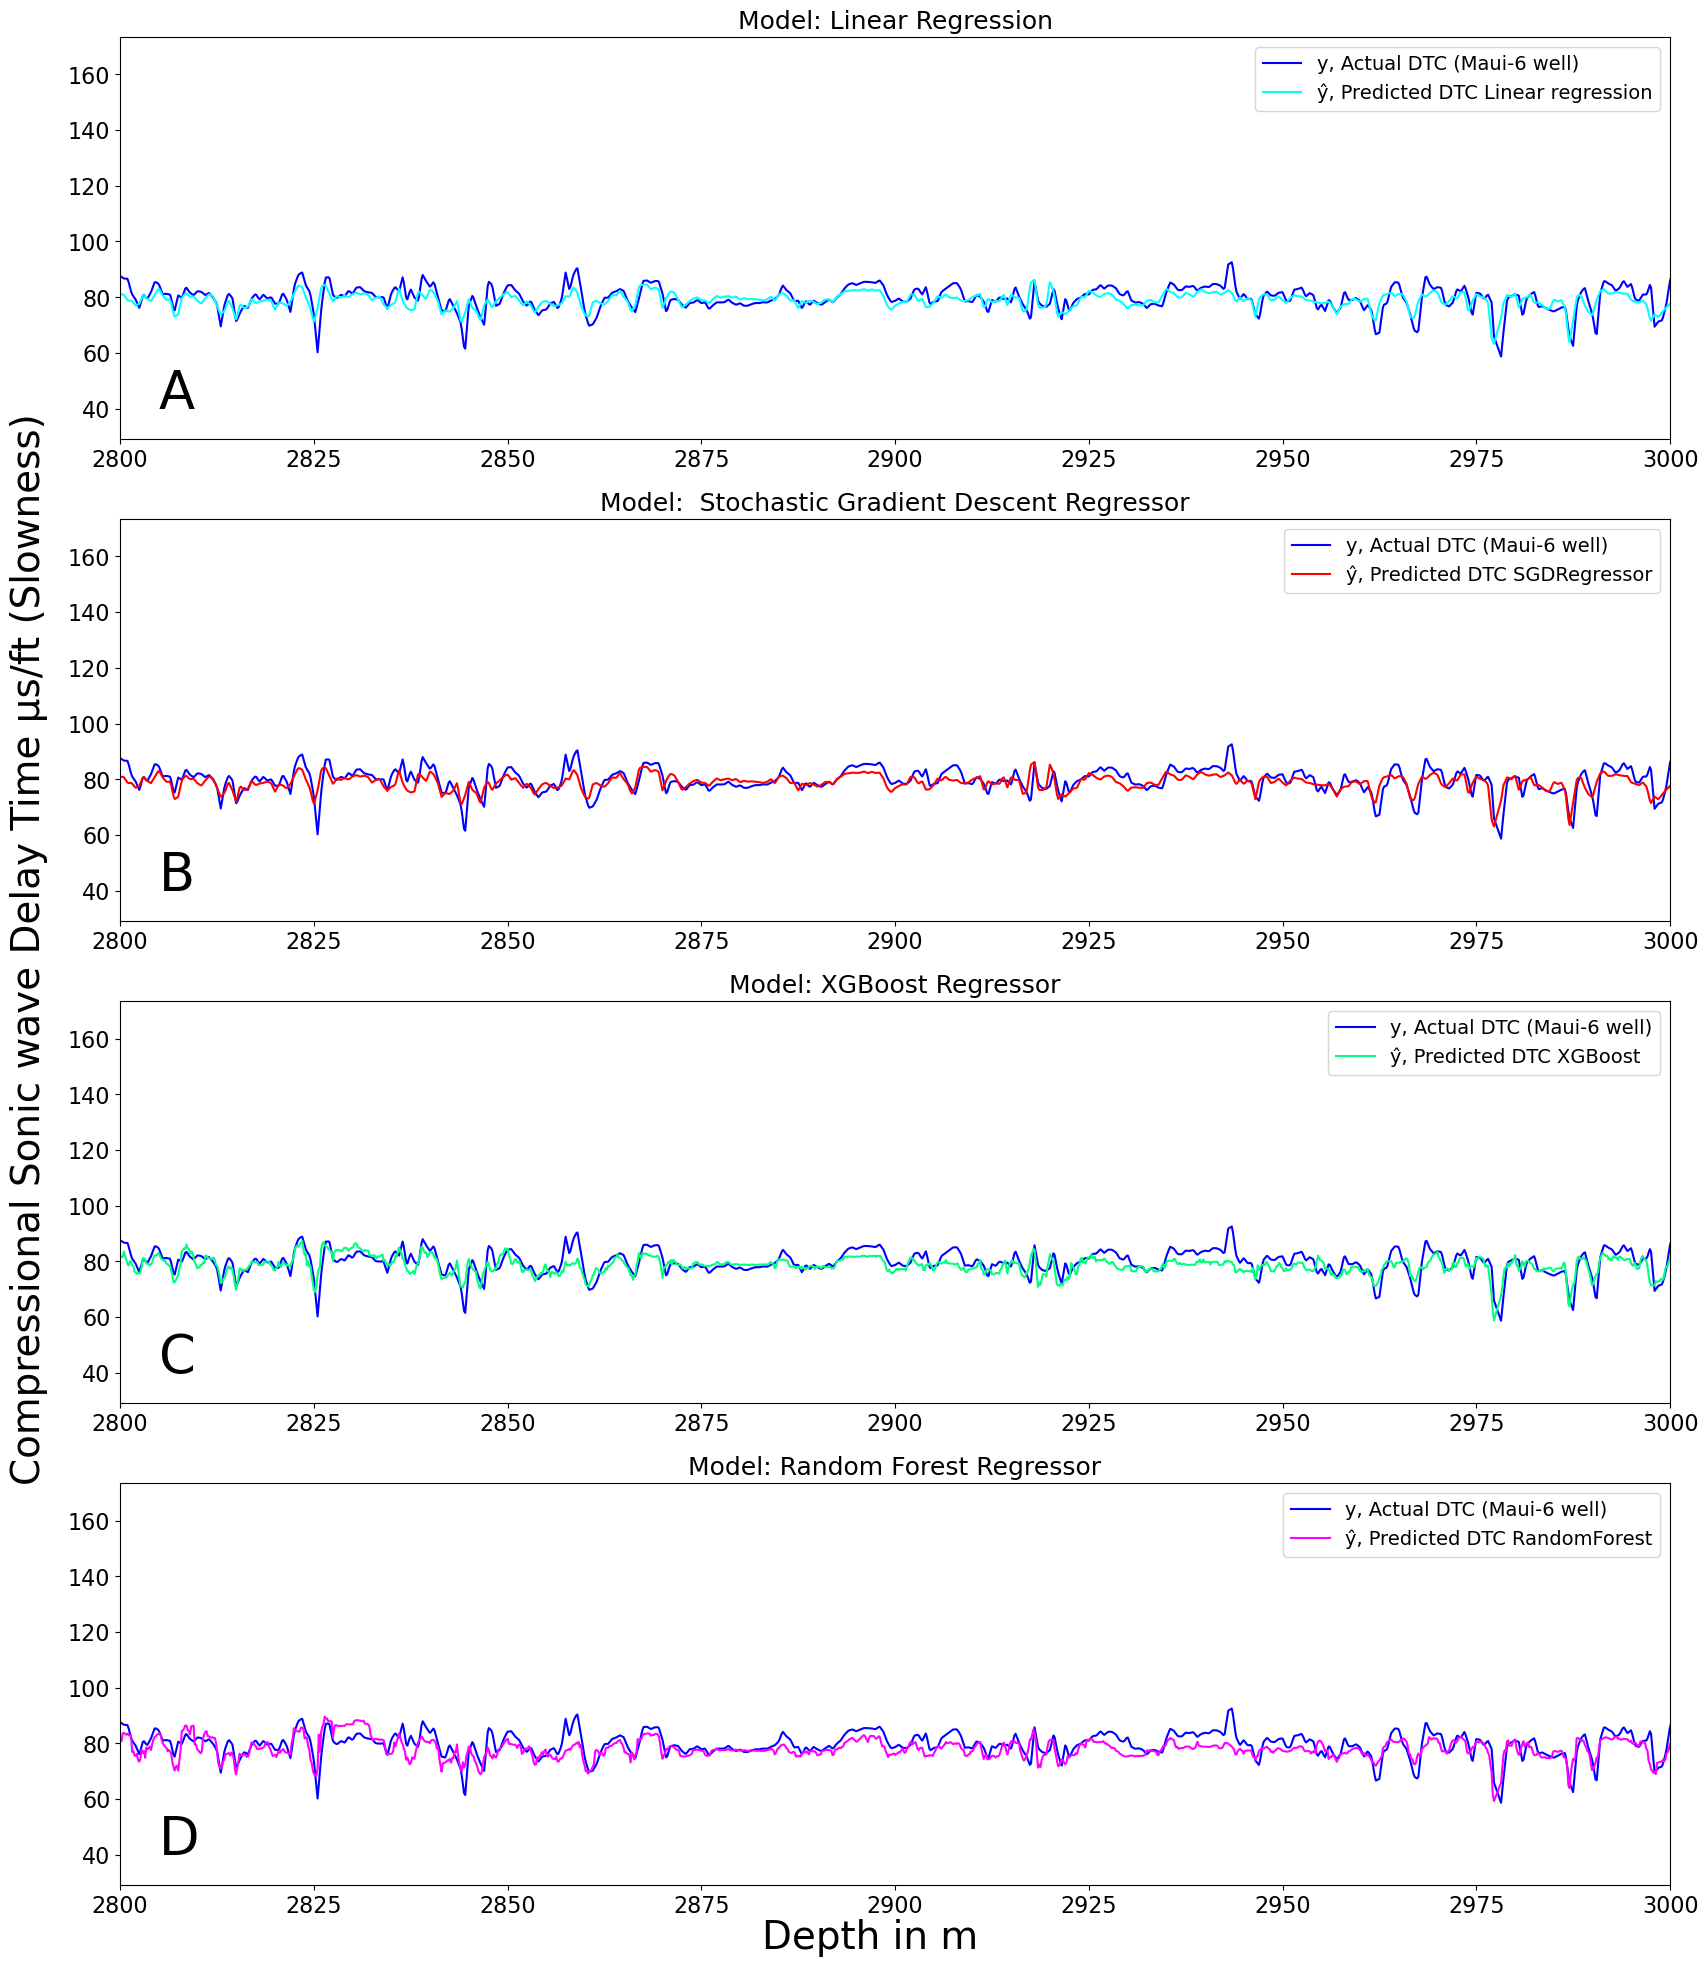

In [426]:
fig = plt.figure(figsize = (20,24))
fontsize_title = 18
fontsize_ticks = 16
fontsize_leg = 14
font_figmark = 38

fig.add_subplot(4,1,1)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred1,label ='ŷ, Predicted DTC Linear regression', color = 'aqua')
plt.xlim(2800,3000)
plt.title('Model: Linear Regression', fontsize = fontsize_title)

# plt.xticks(fontsize=fontsize_ticks, rotation=90)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(2805,40, 'A', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)


fig.add_subplot(4,1,2)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred2,label ='ŷ, Predicted DTC SGDRegressor', color = 'red')
plt.xlim(2800,3000)
plt.title('Model:  Stochastic Gradient Descent Regressor', fontsize = fontsize_title)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(2805,40, 'B', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)

fig.add_subplot(4,1,3)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred3,label ='ŷ, Predicted DTC XGBoost', color = 'springgreen')
plt.xlim(2800,3000)
plt.title('Model: XGBoost Regressor', fontsize = fontsize_title)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(2805,40, 'C', fontsize = font_figmark)
plt.legend(fontsize = fontsize_leg)

fig.add_subplot(4,1,4)
plt.plot(df_test_unseen['DEPT'],y_test_unseen, label = 'y, Actual DTC (Maui-6 well)', color = 'Blue')
plt.plot(df_test_unseen['DEPT'],y_test_pred4,label ='ŷ, Predicted DTC RandomForest', color = 'magenta')
plt.xlim(2800,3000)
plt.title('Model: Random Forest Regressor', fontsize = fontsize_title)

plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
plt.text(2805,40, 'D', fontsize = font_figmark)

fig.supylabel('Compressional Sonic wave Delay Time µs/ft (Slowness)',x = 0.07, y =0.5, fontsize = 28)
fig.supxlabel('Depth in m', x = 0.5,y = 0.08,fontsize = 28)

plt.legend(fontsize = fontsize_leg)

# plt.savefig('results 2800 to 3000.png', dpi = 1200,  bbox_inches='tight')
# plt.show()

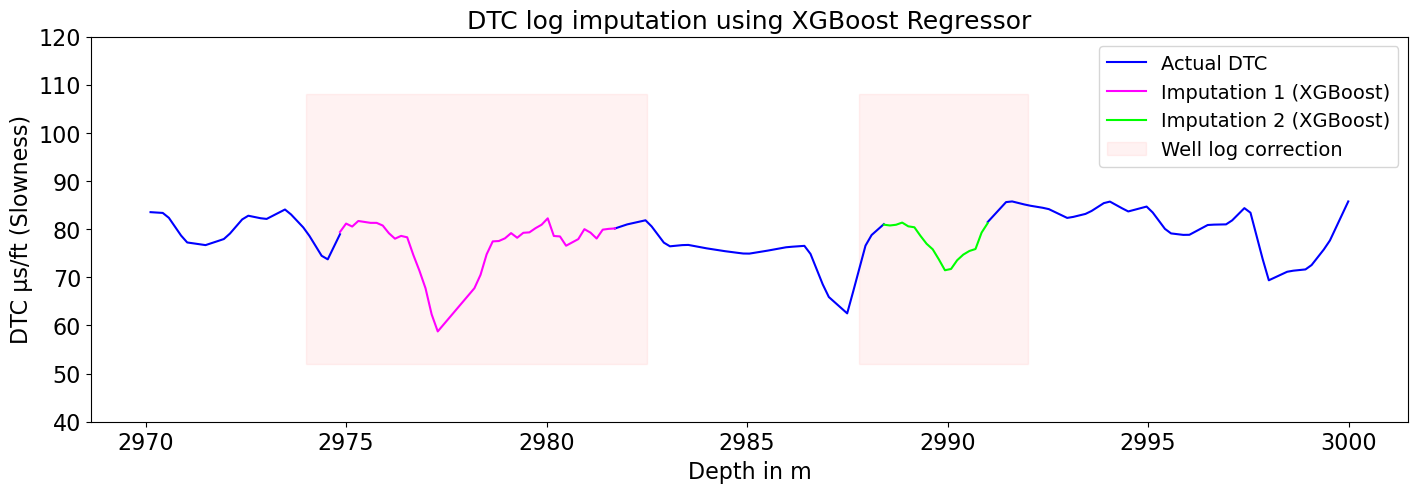

In [383]:
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook is used to turn on interactive mode
# %matplotlib inline is used to turn that off

fontsize_ticks = 16
fontsize_leg = 14

fig = plt.figure(figsize=(17, 5))

dept = df_test_unseen['DEPT']
y_test_unseen_range1 = np.where((dept >= 2970) & (dept <= 2975), y_test_unseen, np.nan)
y_test_unseen_range2 = np.where((dept >= 2981.64) & (dept <= 2988.5), y_test_unseen, np.nan)
y_test_unseen_range3 = np.where((dept >= 2990.88) & (dept <= 3000), y_test_unseen, np.nan)


y_test_pred3_range1 = np.where((dept >= 2974.8) & (dept <= 2981.8), y_test_pred3, np.nan)
y_test_pred3_range2 = np.where((dept >= 2988.35) & (dept <= 2991.15), y_test_pred3, np.nan)

plt.plot(dept, y_test_unseen_range1, label='Actual DTC', color='Blue')
plt.plot(dept, y_test_unseen_range2,color='Blue')
plt.plot(dept, y_test_unseen_range3, color='Blue')

plt.plot(dept, y_test_pred3_range1, label='Imputation 1 (XGBoost)', color='magenta')
plt.plot(dept, y_test_pred3_range2, label='Imputation 2 (XGBoost)', color='lime')

# Uncomment the lines below if you want to add x and y-axis labels

plt.axvspan(2974,2982.5, ymin = 0.15,ymax=0.85, color = 'red' ,alpha = 0.05, label = "Well log correction")
plt.axvspan(2987.8,2992, ymin = 0.15,ymax=0.85, color = 'red' ,alpha = 0.05)
plt.title('DTC log imputation using XGBoost Regressor', fontsize=18)
plt.legend(fontsize = fontsize_leg)
plt.ylim(40,120)

plt.xlabel('Depth in m',fontsize = 16)
plt.ylabel('DTC µs/ft (Slowness)', fontsize = 16)
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

plt.savefig('Imputation 2700 to 3000.png', dpi = 1200,  bbox_inches='tight')
plt.show()


In [429]:
## Uncomment to save the model data for test and validation 

# data_test = {"y_val": y_val,
#                     "y_pred1": y_pred1,
#                     "y_pred2": y_pred2,
#                     "y_pred3": y_pred3,
#                     "y_pred4":y_pred4}
# model_val = pd.DataFrame(data=data_test)
# model_val.to_csv(.csv",index = False)
# print(model_val)

# data_unseen_test = {"y_test_unseen": y_test_unseen,
#                     "y_test_pred1": y_test_pred1,
#                     "y_test_pred2": y_test_pred2,
#                     "y_test_pred3": y_test_pred3,
#                     "y_test_pred4":y_test_pred4}
# model_unseen_test = pd.DataFrame(data=data_unseen_test)
# model_unseen_test .to_csv(r"test.csv",index = False)
# print(model_unseen_test)


           y_val     y_pred1     y_pred2     y_pred3     y_pred4
159253  109.9213  104.451325  104.336672  112.661522  111.386807
48035    92.3358   98.661911   98.612934   98.150627   97.742752
142804   69.4500   66.627772   66.388739   67.353668   69.534711
26372    96.6190   94.990604   94.945452   93.903587   94.660119
85173    79.8000   77.570579   77.557863   79.302513   79.732435
...          ...         ...         ...         ...         ...
135321   82.1328   87.097822   87.083334   83.166763   82.041479
131602   97.2656   98.847976   98.794090   98.733353   97.681053
154418   67.7886   70.176030   70.127810   67.548813   67.918691
113267   76.3512   84.071167   84.032876   80.686638   76.327522
221284  101.9476  102.819262  102.755885  100.396072  101.884915

[53111 rows x 5 columns]
       y_test_unseen  y_test_pred1  y_test_pred2  y_test_pred3  y_test_pred4
0           156.8824    113.066058    112.950394    116.432114    121.271312
1           156.5489    111.974046    11